This is a Leveraged Buyout Model (LBO) based on the case study as described in https://www.streetofwalls.com/finance-training-courses/private-equity-training/paper-lbo-model-example/


I will try to explain everything in as much detail as I can

#Setting Up The Parameters

We take the initial sales , at the end of Year 0 , or at the beginning of Year 1

We take the growth of sales to be 10% and hold the ebitda margin at a constant rate of 40%, of course we can change that and make it variable but for the sake of simplicity let it be 40% throughout our period

We take depreciation and amortization to be constant at 20 million dollars for our period

The weighted interest on the debt can be taken to be 10%

The tax rate on earnings after interest, depreciation and amortization can be taken to be 40%

Valuation takes place at forward twelve months multiple of ebitda , in this case 5

Since this is a leveraged buyout, we finance our operations by debt and the enterprise value is broken into debt and equity segments appropriately

We take capex to be 15% of sales every year

And net working capital increases by 5 million dollars each year  ; again this may be variable, but for the sake of simplicity, take it as a constant

**Calculating FCF**

The Free Cash Flow is just net income , added up by depreciation and amortization, and income going towards capex and working capital subtracted

This FCF can be used to service the debt ; we assume that all of the free cash flow is used to service the debt (not the interest payments, we have already considered that, but the principal portion of the debt)


In [25]:
import pandas as pd

initial_sales_revenue = 100e6
growth_rate = 0.10
ebitda_margin = 0.40
depreciation_amortization = 20e6
interest_rate = 0.10
tax_rate = 0.40
ftm_ebitda_multiple = 5
initial_enterprise_value = ftm_ebitda_multiple*initial_sales_revenue*ebitda_margin
debt_equity_ratio = 3/2
initial_debt = initial_enterprise_value * (debt_equity_ratio/(debt_equity_ratio + 1))
initial_equity = initial_enterprise_value * (1/(debt_equity_ratio + 1))
capex_percentage = 0.15
delta_nwc = 5e6
debt_servicing_by_fcf = 1
years = list(range(1, 7))
sales_revenue = []
ebitda = []
ebit = []
interest_expense = []
ebt = []
tax = []
net_income = []
capex = []
delta_working_capital = [delta_nwc] * len(years)
free_cash_flow = []

for year in years:
    if year == 1:
        sales = initial_sales_revenue
    else:
        sales *= 1 + growth_rate

    sales_revenue.append(sales)
    ebitda.append(sales * ebitda_margin)
    ebit.append(sales * ebitda_margin - depreciation_amortization)
    interest_expense.append(initial_debt * interest_rate)
    ebt.append(sales * ebitda_margin - depreciation_amortization - initial_debt * interest_rate)
    tax.append(ebt[-1] * tax_rate)
    net_income.append(ebt[-1] - tax[-1])
    capex.append(sales * capex_percentage)

    fcf = net_income[-1] + depreciation_amortization - delta_working_capital[-1] - capex[-1]
    free_cash_flow.append(fcf)

financial_data = pd.DataFrame({
    'Year': years,
    'Sales Revenue ($)': sales_revenue,
    'EBITDA ($)': ebitda,
    'EBIT ($)': ebit,
    'Interest Expense ($)': interest_expense,
    'EBT ($)': ebt,
    'Tax ($)': tax,
    'Net Income ($)': net_income,
    'CapEx ($)': capex,
    'ΔNWC ($)': delta_working_capital,
    'Free Cash Flow ($)': free_cash_flow
})

print(financial_data.to_string(index = False))


 Year  Sales Revenue ($)  EBITDA ($)   EBIT ($)  Interest Expense ($)    EBT ($)    Tax ($)  Net Income ($)  CapEx ($)  ΔNWC ($)  Free Cash Flow ($)
    1        100000000.0  40000000.0 20000000.0            12000000.0  8000000.0  3200000.0       4800000.0 15000000.0 5000000.0           4800000.0
    2        110000000.0  44000000.0 24000000.0            12000000.0 12000000.0  4800000.0       7200000.0 16500000.0 5000000.0           5700000.0
    3        121000000.0  48400000.0 28400000.0            12000000.0 16400000.0  6560000.0       9840000.0 18150000.0 5000000.0           6690000.0
    4        133100000.0  53240000.0 33240000.0            12000000.0 21240000.0  8496000.0      12744000.0 19965000.0 5000000.0           7779000.0
    5        146410000.0  58564000.0 38564000.0            12000000.0 26564000.0 10625600.0      15938400.0 21961500.0 5000000.0           8976900.0
    6        161051000.0  64420400.0 44420400.0            12000000.0 32420400.0 12968160.0      19452240.

In [26]:
cumulative_fcf = sum(financial_data['Free Cash Flow ($)'][:5])
print(f"\nTotal Free Cash Flow (Year 1 to 5): ${cumulative_fcf:.2f}")



Total Free Cash Flow (Year 1 to 5): $33945900.00


The total debt is a 120 million dollars, this can be serviced by the free cash flows

**Final Debt**

The Final Debt left is initial_debt subtracted by whatever debt servicing we have done by our free cash flows

In [27]:
final_debt = initial_debt - cumulative_fcf*debt_servicing_by_fcf

final_debt

86054099.99999997

**Final Enterprise Value**

Since valuation takes place at forward twelve months of ebitda, we need to consider ebitda at the end of our period to consider the valuation

We get the exit enterprise value ; we take final debt and subtract it from the enterprise value to get the final equity value

We have the initial equity value , and of course the final equity value now, so we take a ratio and find the multiple of money we have earned

We use that to calculate the internal rate of return , which is pretty straightforward

We further perform a sensitivity analysis for different FTM and debt_equity ratios

This completes our simple LBO analysis

In [28]:
final_ebitda = financial_data['EBITDA ($)'].iloc[-1]
ftm_ebitda_multiple = 5
final_enterprise_value = final_ebitda * ftm_ebitda_multiple
final_equity_value = final_enterprise_value - final_debt

print(f"Enterprise Value at Exit: ${final_enterprise_value:.2f}")
print(f"Equity Value at Exit: ${final_equity_value:.2f}")



Enterprise Value at Exit: $322102000.00
Equity Value at Exit: $236047900.00


In [29]:
multiple_of_money = final_equity_value/initial_equity
internal_rate_of_return = ((multiple_of_money)**(1/(len(years) - 1))) - 1

print(f"Multiple of Money: {multiple_of_money:.2f}")
print(f"Internal Rate of Return: {internal_rate_of_return*100:.2f}%")


Multiple of Money: 2.95
Internal Rate of Return: 24.16%


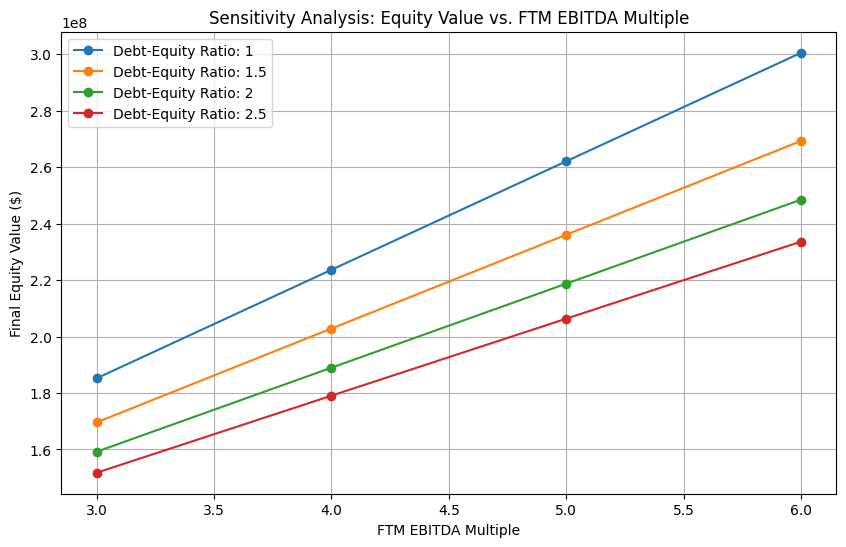

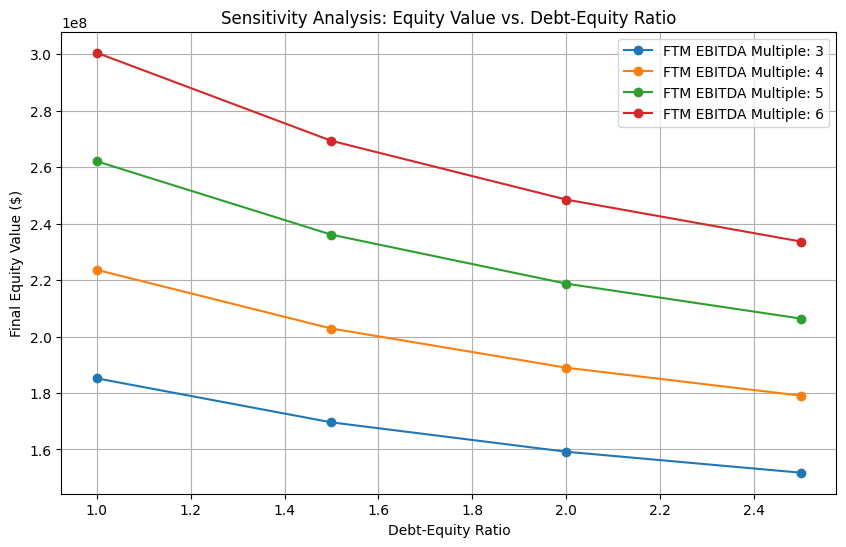

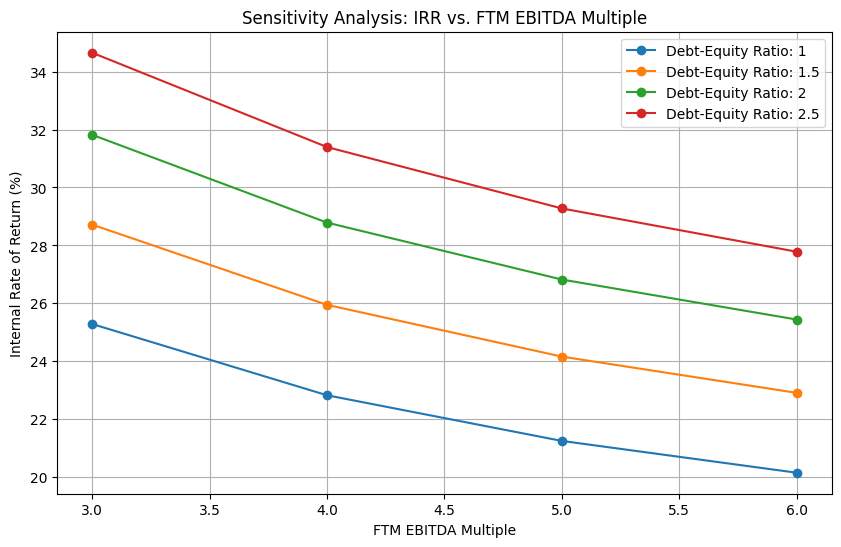

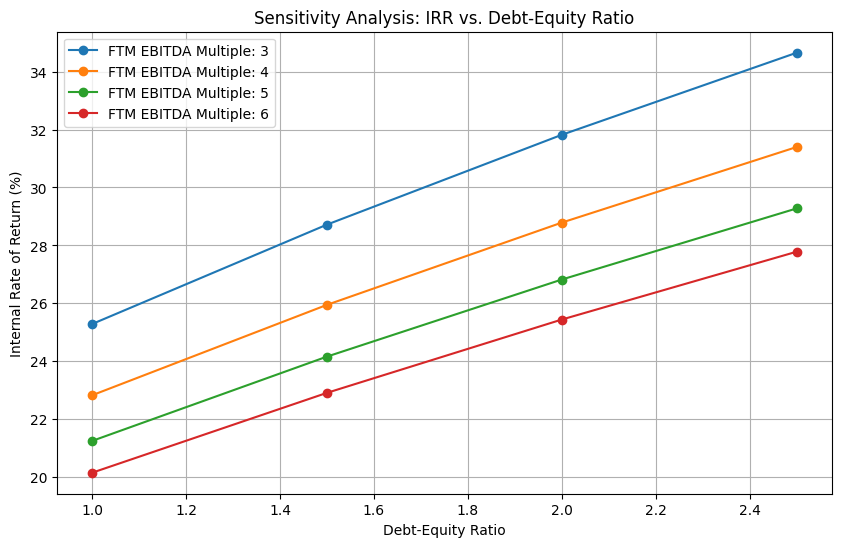

In [30]:
import matplotlib.pyplot as plt

initial_sales_revenue = 100e6
growth_rate = 0.10
ebitda_margin = 0.40
depreciation_amortization = 20e6
interest_rate = 0.10
tax_rate = 0.40
capex_percentage = 0.15
delta_nwc = 5e6

def calculate_financial_data(ftm_ebitda_multiple, debt_equity_ratio):
  """Calculates financial data for a given FTM EBITDA multiple and debt-equity ratio."""

  initial_enterprise_value = ftm_ebitda_multiple * initial_sales_revenue * ebitda_margin
  initial_debt = initial_enterprise_value * (debt_equity_ratio / (debt_equity_ratio + 1))
  initial_equity = initial_enterprise_value * (1 / (debt_equity_ratio + 1))

  years = list(range(1, 7))
  sales_revenue = []
  ebitda = []
  ebit = []
  interest_expense = []
  ebt = []
  tax = []
  net_income = []
  capex = []
  delta_working_capital = [delta_nwc] * len(years)
  free_cash_flow = []

  for year in years:
      if year == 1:
          sales = initial_sales_revenue
      else:
          sales *= 1 + growth_rate

      sales_revenue.append(sales)
      ebitda.append(sales * ebitda_margin)
      ebit.append(sales * ebitda_margin - depreciation_amortization)
      interest_expense.append(initial_debt * interest_rate)
      ebt.append(sales * ebitda_margin - depreciation_amortization - initial_debt * interest_rate)
      tax.append(ebt[-1] * tax_rate)
      net_income.append(ebt[-1] - tax[-1])
      capex.append(sales * capex_percentage)

      fcf = net_income[-1] + depreciation_amortization - delta_working_capital[-1] - capex[-1]
      free_cash_flow.append(fcf)

  financial_data = pd.DataFrame({
      'Year': years,
      'Sales Revenue ($)': sales_revenue,
      'EBITDA ($)': ebitda,
      'EBIT ($)': ebit,
      'Interest Expense ($)': interest_expense,
      'EBT ($)': ebt,
      'Tax ($)': tax,
      'Net Income ($)': net_income,
      'CapEx ($)': capex,
      'ΔNWC ($)': delta_working_capital,
      'Free Cash Flow ($)': free_cash_flow
  })

  cumulative_fcf = sum(financial_data['Free Cash Flow ($)'][:5])

  final_debt = initial_debt - cumulative_fcf

  final_ebitda = financial_data['EBITDA ($)'].iloc[-1]
  final_enterprise_value = final_ebitda * ftm_ebitda_multiple
  final_equity_value = final_enterprise_value - final_debt

  multiple_of_money = final_equity_value / initial_equity
  internal_rate_of_return = ((multiple_of_money) ** (1 / (len(years) - 1))) - 1

  return {
      'FTM EBITDA Multiple': ftm_ebitda_multiple,
      'Debt-Equity Ratio': debt_equity_ratio,
      'Final Enterprise Value ($)': final_enterprise_value,
      'Final Equity Value ($)': final_equity_value,
      'Multiple of Money': multiple_of_money,
      'Internal Rate of Return (%)': internal_rate_of_return * 100
  }

#graphical analysis
ftm_ebitda_multiples = [3, 4, 5, 6]
debt_equity_ratios = [1, 1.5, 2, 2.5]

results = []
for ftm_multiple in ftm_ebitda_multiples:
  for debt_ratio in debt_equity_ratios:
      result = calculate_financial_data(ftm_multiple, debt_ratio)
      results.append(result)

sensitivity_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(10, 6))

# relationship between FTM EBITDA multiple and Equity Value
for debt_ratio in debt_equity_ratios:
    subset = sensitivity_df[sensitivity_df['Debt-Equity Ratio'] == debt_ratio]
    ax.plot(subset['FTM EBITDA Multiple'], subset['Final Equity Value ($)'], marker='o', label=f'Debt-Equity Ratio: {debt_ratio}')

ax.set_xlabel('FTM EBITDA Multiple')
ax.set_ylabel('Final Equity Value ($)')
ax.set_title('Sensitivity Analysis: Equity Value vs. FTM EBITDA Multiple')
ax.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

#relationship between Debt-Equity Ratio and Equity Value
for ftm_multiple in ftm_ebitda_multiples:
    subset = sensitivity_df[sensitivity_df['FTM EBITDA Multiple'] == ftm_multiple]
    ax.plot(subset['Debt-Equity Ratio'], subset['Final Equity Value ($)'], marker='o', label=f'FTM EBITDA Multiple: {ftm_multiple}')

ax.set_xlabel('Debt-Equity Ratio')
ax.set_ylabel('Final Equity Value ($)')
ax.set_title('Sensitivity Analysis: Equity Value vs. Debt-Equity Ratio')
ax.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

#relationship between FTM EBITDA multiple and IRR
for debt_ratio in debt_equity_ratios:
    subset = sensitivity_df[sensitivity_df['Debt-Equity Ratio'] == debt_ratio]
    ax.plot(subset['FTM EBITDA Multiple'], subset['Internal Rate of Return (%)'], marker='o', label=f'Debt-Equity Ratio: {debt_ratio}')

ax.set_xlabel('FTM EBITDA Multiple')
ax.set_ylabel('Internal Rate of Return (%)')
ax.set_title('Sensitivity Analysis: IRR vs. FTM EBITDA Multiple')
ax.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

# relationship between Debt-Equity Ratio and IRR
for ftm_multiple in ftm_ebitda_multiples:
    subset = sensitivity_df[sensitivity_df['FTM EBITDA Multiple'] == ftm_multiple]
    ax.plot(subset['Debt-Equity Ratio'], subset['Internal Rate of Return (%)'], marker='o', label=f'FTM EBITDA Multiple: {ftm_multiple}')

ax.set_xlabel('Debt-Equity Ratio')
ax.set_ylabel('Internal Rate of Return (%)')
ax.set_title('Sensitivity Analysis: IRR vs. Debt-Equity Ratio')
ax.legend()
plt.grid(True)
plt.show()
